In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data_dir = 'datas'

train_data_path = join(data_dir, 'sales_train.csv')
sub_data_path = join(data_dir, 'test.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로

print(train_data_path)
print(sub_data_path)

datas/sales_train.csv
datas/test.csv


In [14]:
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

train data dim : (2935849, 6)
sub data dim : (214200, 3)


# 1. 데이터 살펴보기   
   
ID-  테스트 세트 내에서 (Shop, Item) 튜플을 나타내는 Id   
shop_id- 상점의 고유 식별자   
item_id- 상품의 고유 식별자   
item_category_id- 항목 카테고리의 고유 식별자   
item_cnt_day- 판매 된 제품 수입니다. 이 측정 값의 월별 금액을 예측하고 있습니다.   
item_price- 상품의 현재 가격   
date  -dd / mm / yyyy 형식의 날짜   
date_block_num- 편의를 위해 사용되는 연속 된 월 번호. 2013 년 1 월은 0, 2013 년 2 월은 1, ..., 2015 년 10 월은 33입니다.   
item_name-  항목 이름   
shop_name- 상점 이름   
item_category_name- 항목 카테고리 이름   

In [15]:
print(data.columns)

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')


In [17]:
print(sub.columns)

Index(['ID', 'shop_id', 'item_id'], dtype='object')


In [18]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [20]:
sub.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


<AxesSubplot:>

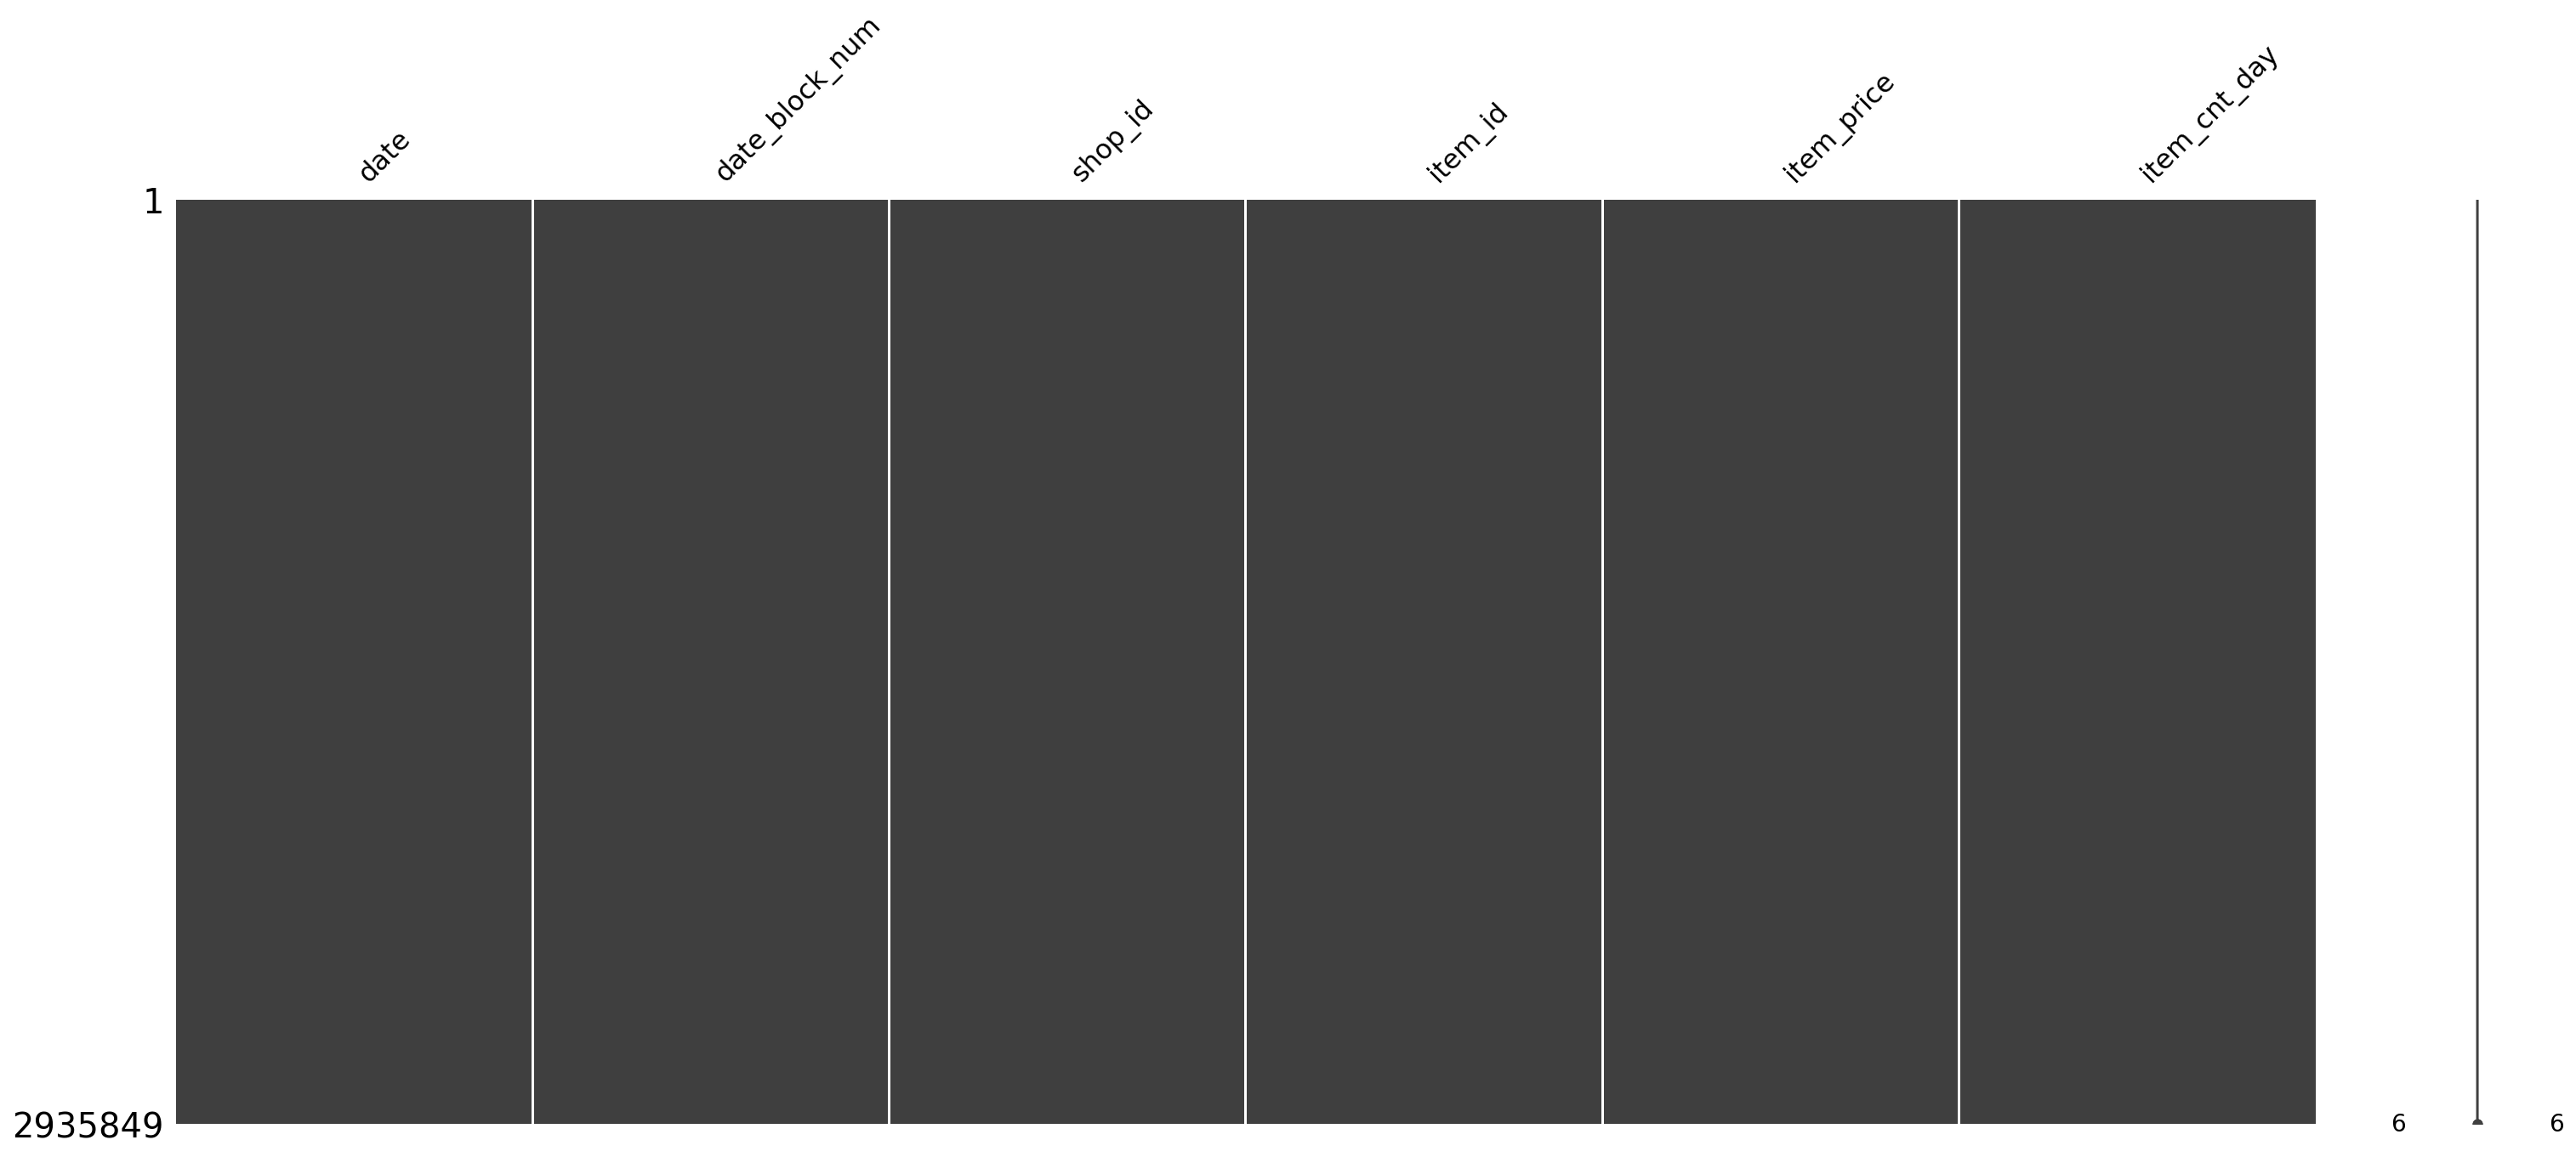

In [22]:
msno.matrix(data)

<AxesSubplot:>

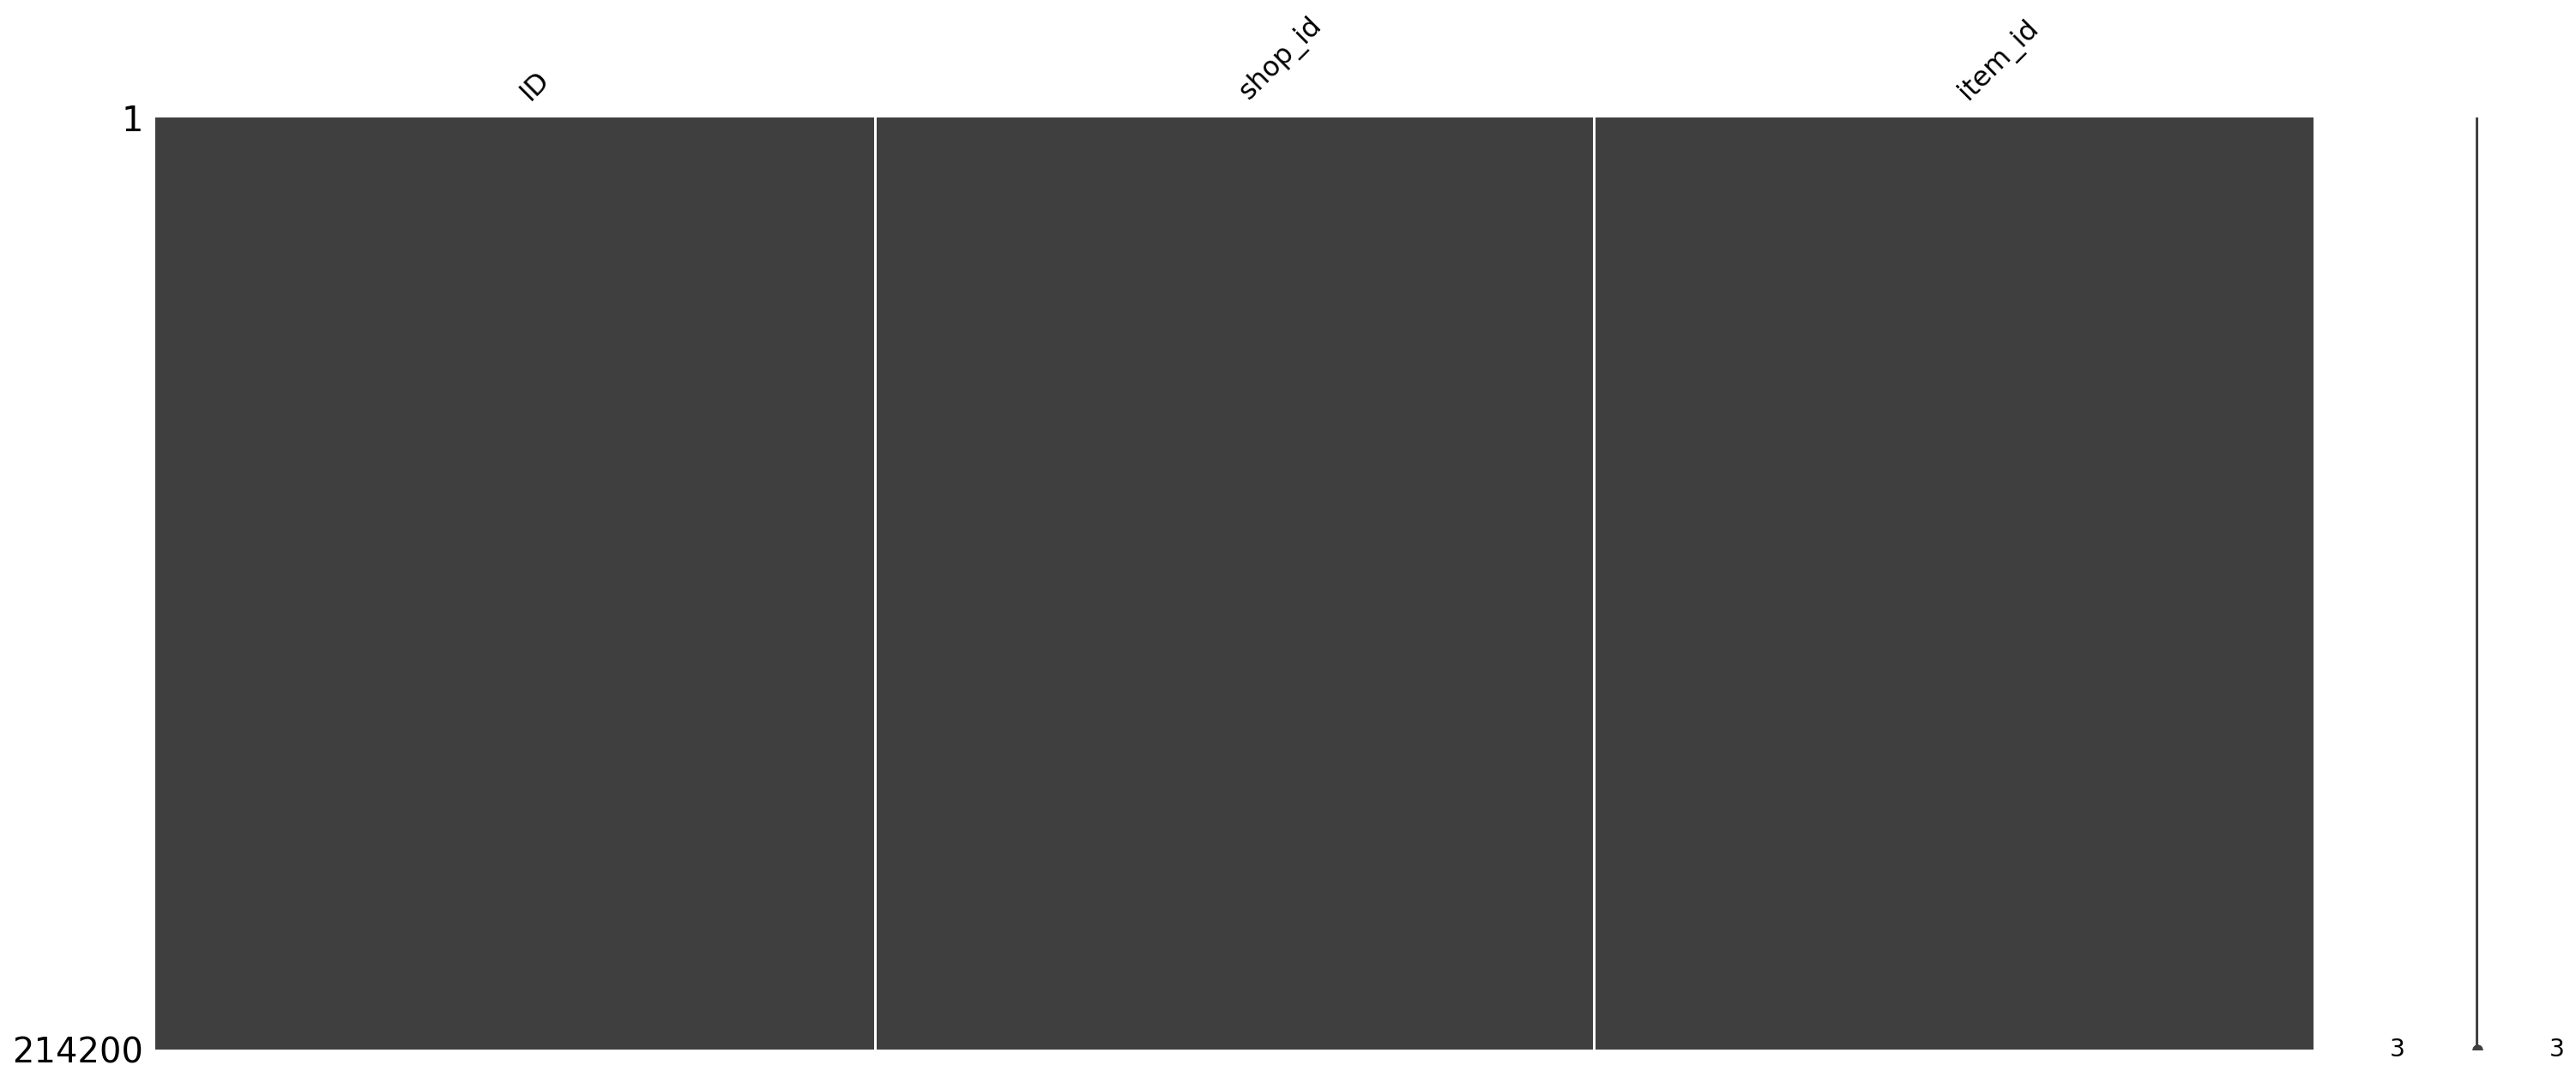

In [23]:
msno.matrix(sub)